In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задача 1

+ 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices
+ 1.2 Изучите стоимости недвижимости
+ 1.3 Изучите распределение квадратуры жилой
+ 1.4 Изучите распределение года постройки

Постройте график и назовите. Сделайте именование оси x и оси y<br/>
Сделайте выводы<br/>

In [2]:
df = pd.read_csv('kc_house_data.csv', parse_dates=['date'], dayfirst=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

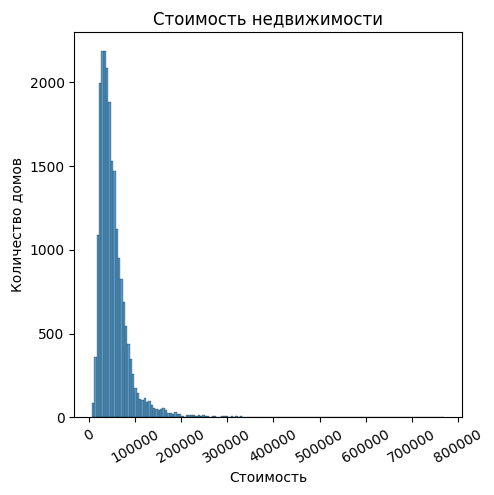

In [3]:
price = df['price'] * 0.1
# seaborn
plt.figure(figsize=(5, 5))
sns.histplot(price, bins=150)
plt.title('Cтоимость недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество домов')
plt.xticks(rotation=30);

### 1.3 Изучите распределение квадратуры жилой

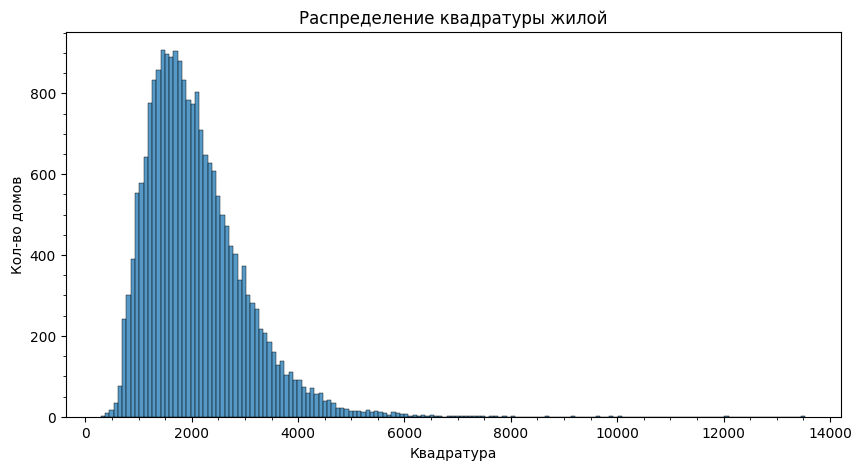

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(df['sqft_living'])
plt.title('Распределение квадратуры жилой')
plt.xlabel('Квадратура')
plt.ylabel('Кол-во домов')
plt.minorticks_on();

### 1.4 Изучите распределение года постройки

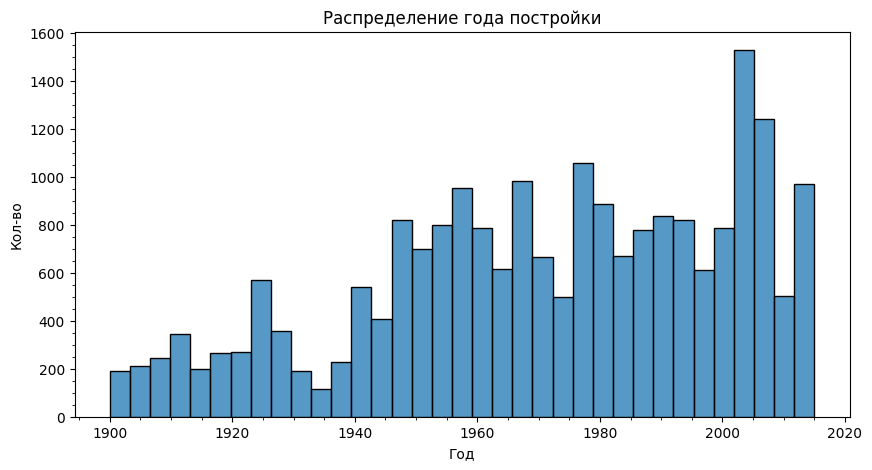

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df['yr_built']);
plt.title('Распределение года постройки')
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.minorticks_on();

## Задача 2

+ 2.1 Изучите распределение домов от наличия вида на набережную<br/>
Постройте график и сделайте выводы
+ 2.2 Изучите распределение этажей домов
+ 2.3 Изучите распределение состояния домов

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график и сделайте выводы

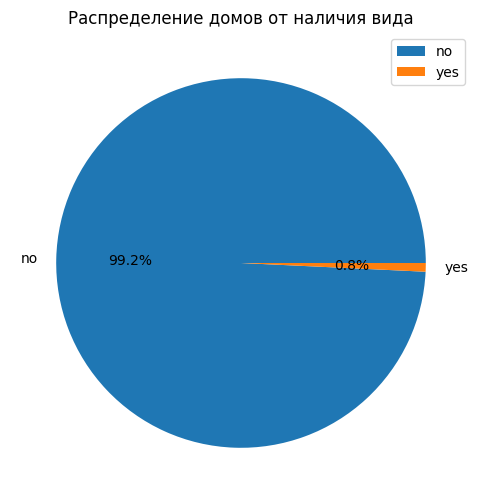

In [6]:
data = df['waterfront'].value_counts()
data.index = ['no', 'yes']
plt.figure(figsize=(6, 6))
plt.pie(data, autopct='%1.1f%%', labels=data.index)
plt.title('Pаспределение домов от наличия вида')
plt.legend()

### 2.2 Изучите распределение этажей домов

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '1.5'),
  Text(2, 0, '2.0'),
  Text(3, 0, '2.5'),
  Text(4, 0, '3.0'),
  Text(5, 0, '3.5')])

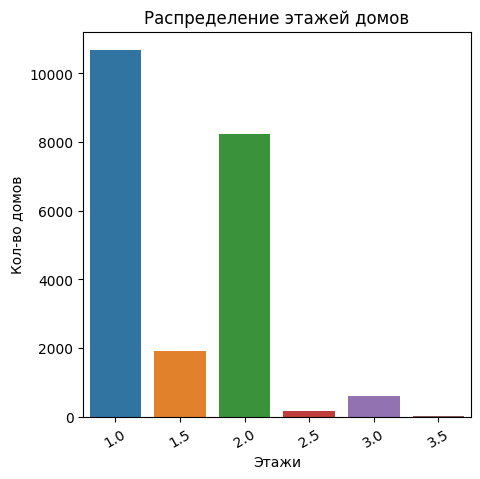

In [7]:
floors = df['floors'].value_counts()

plt.figure(figsize=(5, 5))
sns.barplot(x=floors.index, y=floors)
plt.title('Pаспределение этажей домов')
plt.xlabel('Этажи')
plt.ylabel('Кол-во домов')
plt.xticks(rotation=30)


Text(0, 0.5, 'Кол-во домов')

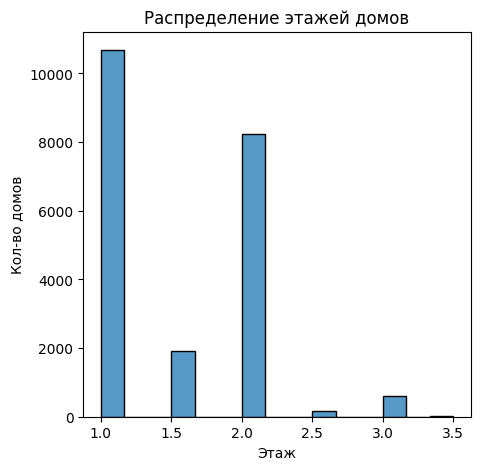

In [8]:
plt.figure(figsize=(5, 5))
sns.histplot(df['floors'], bins=15);
plt.title('Распределение этажей домов')
plt.xlabel('Этаж')
plt.ylabel('Кол-во домов')

### 2.3 Изучите распределение состояния домов

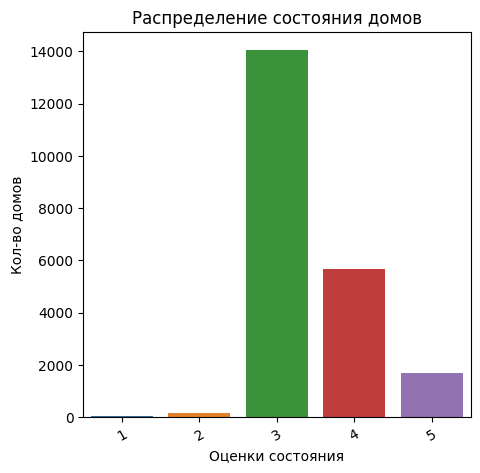

In [9]:
cond = df['condition'].value_counts()

plt.figure(figsize=(5, 5))
sns.barplot(x=cond.index, y=cond)
plt.title('Pаспределение состояния домов')
plt.xlabel('Оценки состояния')
plt.ylabel('Кол-во домов')
plt.xticks(rotation=30);

## Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.<br/>
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

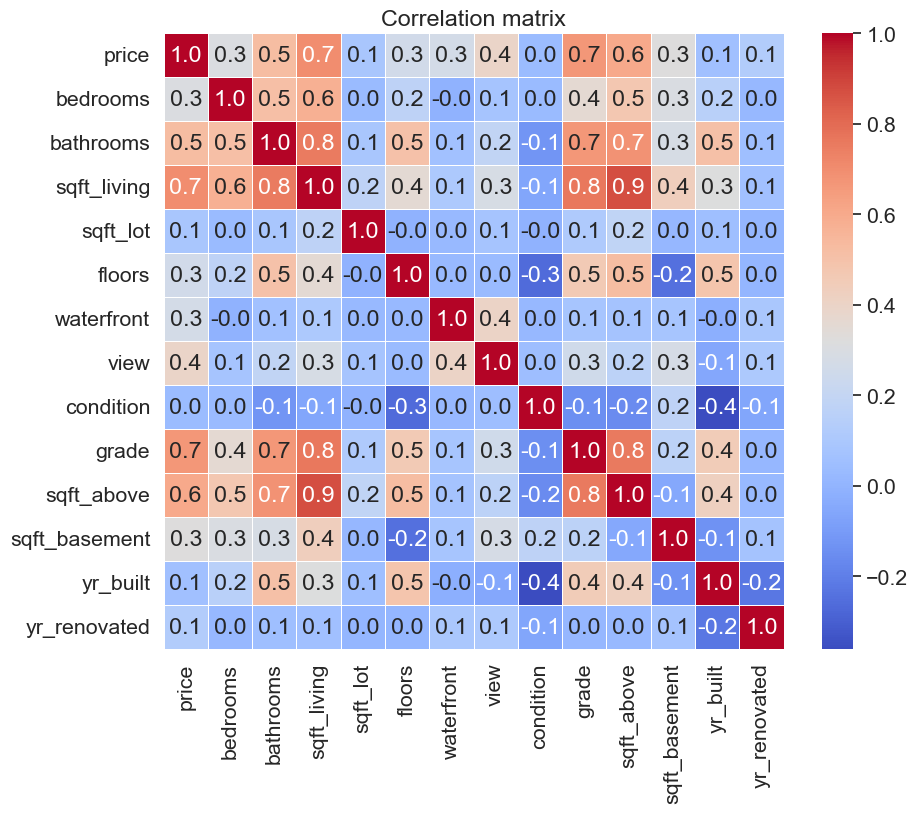

In [10]:
data5 = df.drop(columns=['id', 'date', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'])
corr_matrix = data5.corr()
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm',fmt = '.1f')

plt.title('Correlation matrix');

По корреляционной матрице видим, что на стоимость недвижимости большее влияние оказывают внешний вид и жилая площадь, чаще без подвала, а так же наличие ванной комнаты.

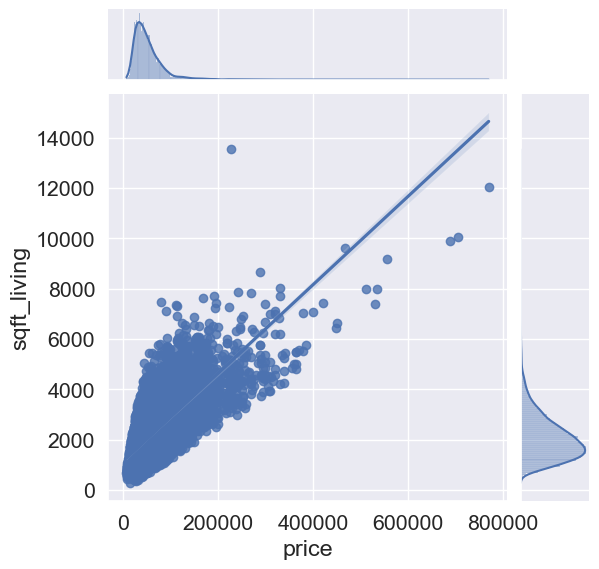

In [18]:
sns.jointplot(x=price, y=df['sqft_living'], kind='reg');

Видим, что чем больше площадь дома, тем больше его стоимость

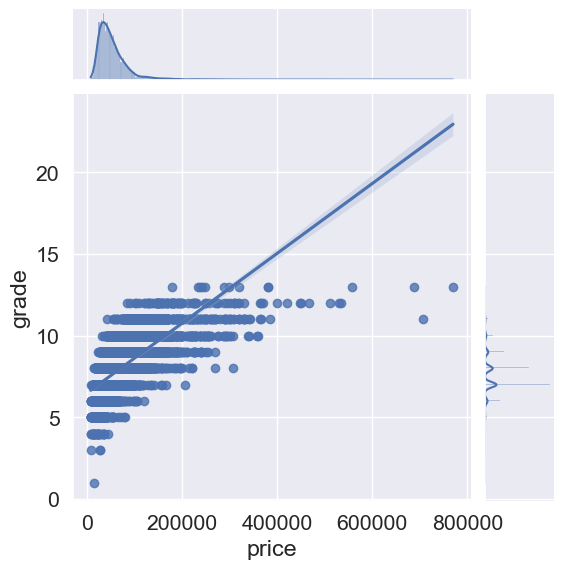

In [20]:
sns.jointplot(x=price, y=df['grade'], kind='reg');

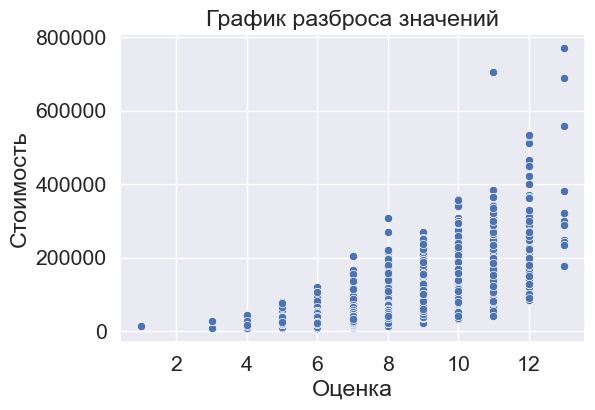

In [12]:
plt.figure(figsize=(6, 4))

sns.scatterplot(y=price, x=df['grade'])

plt.title('График разброса значений')
plt.xlabel('Оценка')
plt.ylabel('Стоимость');

Видим, что чем выше качество конструкции и дизайна дома, тем выше его стоимость

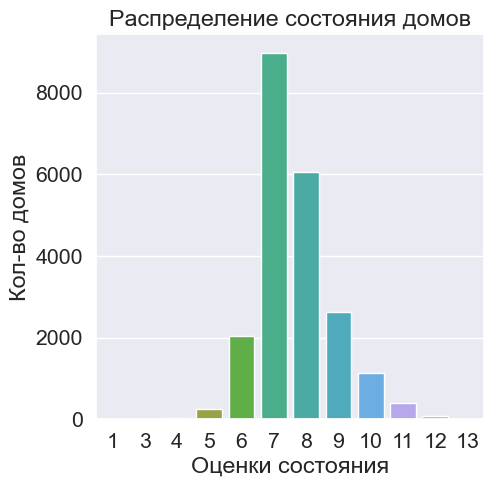

In [28]:
grad = df['grade'].value_counts()

plt.figure(figsize=(5, 5))
sns.barplot(x=grad.index, y=grad)
plt.title('Pаспределение состояния домов')
plt.xlabel('Оценки состояния')
plt.ylabel('Кол-во домов');

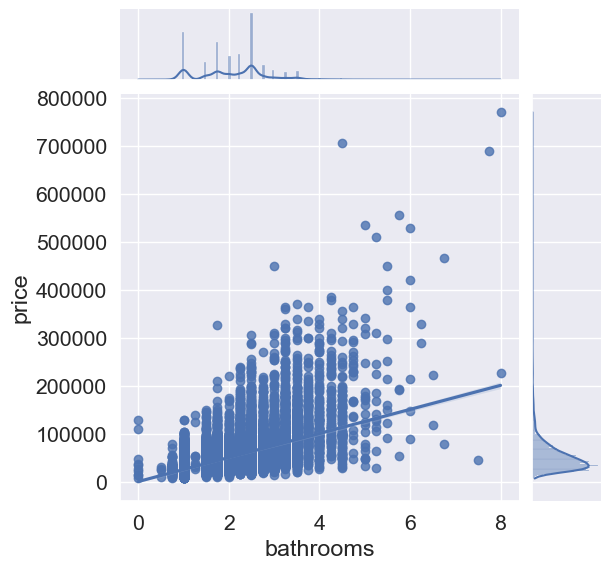

In [14]:
sns.jointplot(x='bathrooms', y=price, data=df, kind='reg');

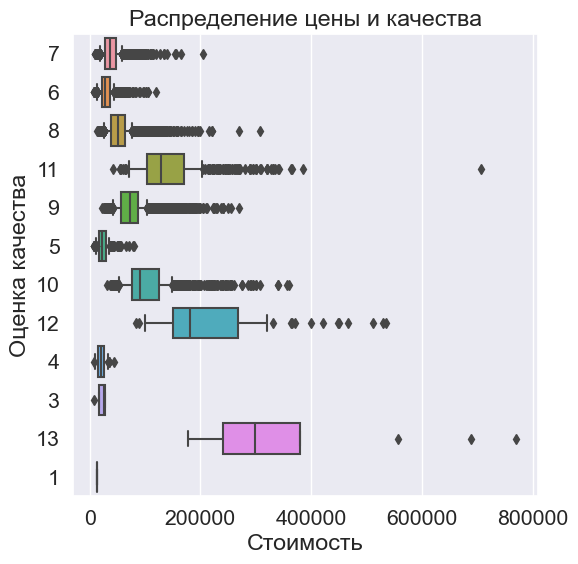

In [36]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=price, y=df['grade'].astype('str'), whis=0.5);
plt.xlabel('Стоимость')
plt.ylabel('Оценка качества')
plt.title('Распределение цены и качества');

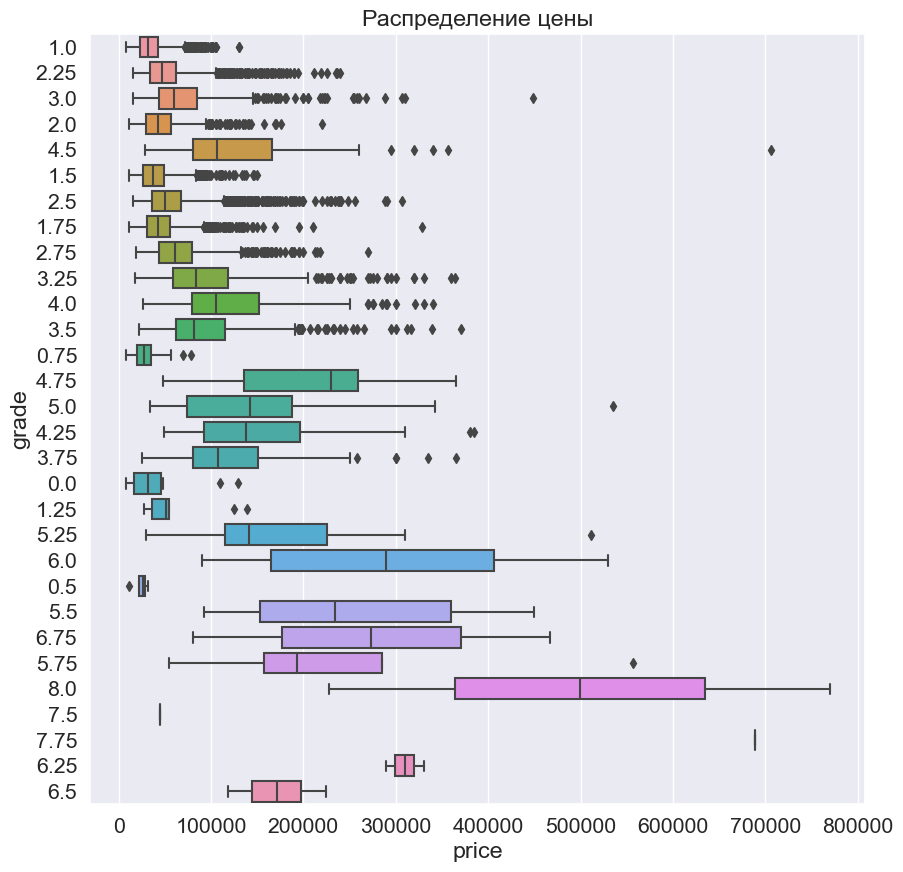

In [37]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=price, y=df['bathrooms'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('grade')
plt.title('Распределение цены');